<a href="https://colab.research.google.com/github/Nakiyah24/ExplainableAI_Assignments/blob/main/Assignment4/Assignment%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4
## Nakiyah Dhariwala


### Final Dataset Selection:
https://archive.ics.uci.edu/dataset/320/student+performance


In [1]:
!pip install -q "scipy==1.13.1"

In [2]:
!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython

  Cloning https://github.com/MaximeJumelle/ALEPython.git (to revision dev) to /tmp/pip-install-y2riz4ol/alepython_dd6690c0782d45b48c76286e132a5fd4
  Running command git clone --filter=blob:none --quiet https://github.com/MaximeJumelle/ALEPython.git /tmp/pip-install-y2riz4ol/alepython_dd6690c0782d45b48c76286e132a5fd4
  Resolved https://github.com/MaximeJumelle/ALEPython.git to commit 286350ab674980a32270db2a0b5ccca1380312a7
  Preparing metadata (setup.py) ... done


In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from alepython import ale_plot


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.inspection import PartialDependenceDisplay


# Set options to display all rows and columns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

### Step 1: loading and viewing the dataset

I am just doing initial EDA to check for missing values, incorrect data types and to see what the data contains

In [4]:
# Loading the math dataset
df = pd.read_csv("https://raw.githubusercontent.com/Nakiyah24/ExplainableAI_Assignments/refs/heads/main/Assignment4/student-mat.csv", sep=";")

In [5]:
# Quick look
print("The dimensions of this dataset are:", df.shape)
print("The columns for this dataset are", df.columns)

The dimensions of this dataset are: (395, 33)
The columns for this dataset are Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [6]:
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         3       yes     no  yes   
3    home   mother           1          3         0        no    yes  yes   
4    home   father           1          2         0        no    yes  yes   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \


In [7]:
# Checking for missing values
print(df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [8]:
# Quick check for numeric values
print(df.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

There are no missing values so we can proceed with the next step of looking at and chaing the data types of features if needed

In [9]:
print(df.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


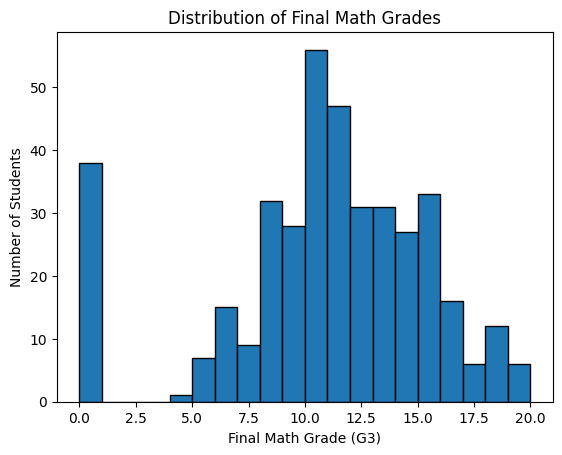

In [10]:
# Looking at the distribution of the target variable

plt.hist(df["G3"], bins=20, edgecolor="k")
plt.xlabel("Final Math Grade (G3)")
plt.ylabel("Number of Students")
plt.title("Distribution of Final Math Grades")
plt.show()

In [11]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [12]:
# I am explicitly defining columns and its types for my convenience

target = "G3"


binary_cols = [
    "schoolsup",
    "famsup",
    "paid",
    "activities",
    "nursery",
    "higher",
    "internet",
    "romantic",
]

ordinal_cols = [
    "age",
    "Medu",
    "Fedu",
    "traveltime",
    "studytime",
    "failures",
    "famrel",
    "freetime",
    "goout",
    "Dalc",
    "Walc",
    "health",
    "absences",
    "G1",
    "G2",
]

nominal_cols = [
    "school",
    "sex",
    "address",
    "famsize",
    "Pstatus",
    "Mjob",
    "Fjob",
    "reason",
    "guardian",
]

# explicitly defining the dataset and the predictor variable
predictors = binary_cols + ordinal_cols + nominal_cols
data = df[predictors + [target]].copy()

In [13]:
# mapping binaries to yes/no
yesno_map = {"yes": 1, "no": 0, "Yes": 1, "No": 0}
for col in binary_cols:
    data[col] = data[col].map(yesno_map).astype("int8")

In [14]:
# ordinals + binaries + target -- to be used in correlation
num = data[ordinal_cols + binary_cols + [target]]

In [15]:
# Pearson correlations
corr_p = num.corr(method="pearson")

# Sort by absolute correlation with G3
cw = corr_p["G3"].drop("G3")
order = cw.abs().sort_values(ascending=False).index
corr_with_G3 = pd.DataFrame({"corr": cw.loc[order], "abs_corr": cw.abs().loc[order]})
print(corr_with_G3.head(15))

                corr  abs_corr
G2          0.904868  0.904868
G1          0.801468  0.801468
failures   -0.360415  0.360415
Medu        0.217147  0.217147
higher      0.182465  0.182465
age        -0.161579  0.161579
Fedu        0.152457  0.152457
goout      -0.132791  0.132791
romantic   -0.129970  0.129970
traveltime -0.117142  0.117142
paid        0.101996  0.101996
internet    0.098483  0.098483
studytime   0.097820  0.097820
schoolsup  -0.082788  0.082788
health     -0.061335  0.061335


### Pearson correlation

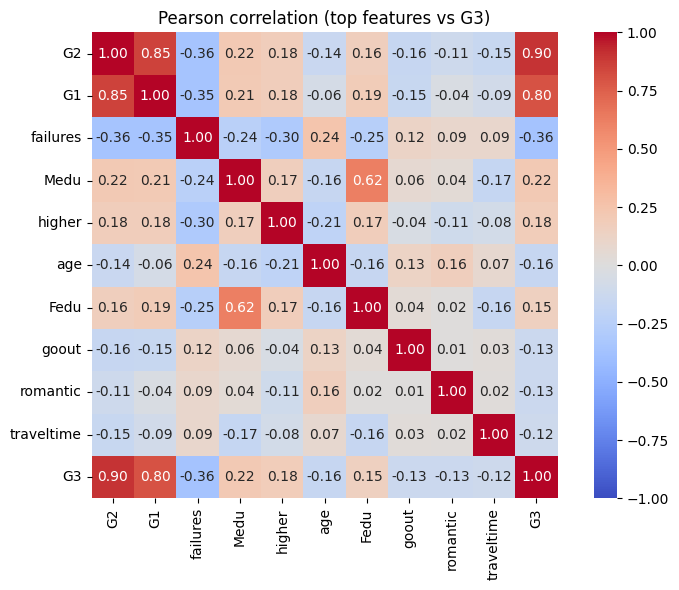

In [16]:
# creating heatmap of top correlates
topk = order[:10].tolist() + ["G3"]
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_p.loc[topk, topk],
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    square=True,
)
plt.title("Pearson correlation (top features vs G3)")
plt.tight_layout()
plt.show()

We can see very strong correlations for G1 and G2 with G3, which makes sense since prior grades would dominate and be a good predictor of the final grade. Students who have more past failures also have a tendency to perform worse (-0.36). Interestingly, mother's education does have a small positive effect (0.22). Lifestyle factors such as going out with friends, being in a relationship, or having longer travel times show only weak negative links, while father’s education and alcohol consumption appear to have little effect.

### Building Random Forest Model

I am going to perform a Random Forest regressor for this dataset since it would be able to model nonlinear relationships and interactions. It also conventiently handles small datasets without requiring heavy hyperparameter tuning.

However, before running the Random Forest regressor, I am going to intentionally remove G1 and G2 from the main model to remove the 'prior math grade predicts final math grade' dynamics and instead focus on the students' habits and behaviours.

In [17]:
# removing G1 and G2
predictors = [col for col in predictors if col not in ["G1", "G2"]]

# one-hot encoding nominal categories
X = pd.get_dummies(data[predictors], columns=nominal_cols, drop_first=True)
y = data[target].astype(float)

print("Shape after encoding:", X.shape)
print("Shape of target variable", y.shape)

Shape after encoding: (395, 39)
Shape of target variable (395,)


In [18]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [19]:
# Fitting RF model
rf = RandomForestRegressor(
    n_estimators=600,  # a bit higher for stability
    max_depth=None,  # letting trees grow; small dataset
    min_samples_leaf=2,  # mild regularization
    random_state=42,
    n_jobs=-1,
)
rf.fit(X_train, y_train)

# I used Chatgpt to help me figure the hyperparater tuning

RandomForestRegressor(min_samples_leaf=2, n_estimators=600, n_jobs=-1,
                      random_state=42)

### Doing Permutation importance to find top important features

/tmp/ipython-input-1054011021.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fi.head(15).values, y=fi.head(15).index, palette="viridis")


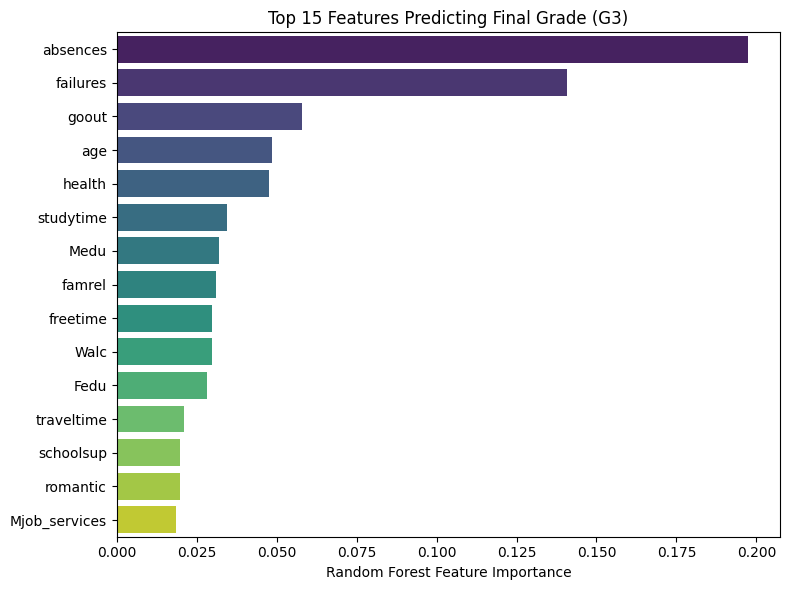

absences         0.197511
failures         0.140756
goout            0.057922
age              0.048583
health           0.047737
studytime        0.034448
Medu             0.032054
famrel           0.030913
freetime         0.029786
Walc             0.029751
Fedu             0.028125
traveltime       0.020903
schoolsup        0.019786
romantic         0.019712
Mjob_services    0.018501
dtype: float64


In [20]:
# Feature importance values
fi = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Show top 15
plt.figure(figsize=(8, 6))
sns.barplot(x=fi.head(15).values, y=fi.head(15).index, palette="viridis")
plt.xlabel("Random Forest Feature Importance")
plt.ylabel("")
plt.title("Top 15 Features Predicting Final Grade (G3)")
plt.tight_layout()
plt.show()

# Also print top 15
print(fi.head(15))

Based on the feature importance plot above, we can see that a student's absences and failures play a relatively important role in their final Math grade.


For my analysis, I am going to choose 'absence' and 'studytime' and examine their effects using three interpretability tools. The first, A one-dimensional Partial Dependence Plot (PDP) will help show me the average effect of a feature on the model’s predictions, marginalizing over all the other features. While PDP is good for getting a global, averaged view, the Individual Conditional Expectation (ICE) will plot the prediction for each individual student as one feature is varied (for instance, absences and studytime), keeping all others fixed. It will essentially help me uncover the interaction effects that PDP averages would hide. The last interpretability tool I will use is Accumulated Local Effects (ALE), which shows the local effect of a feature on predictions. However, unlike the PDP, it will not extrapolate into regions where there is little or missing data, which is helpful in skewed or correlated datasets.

### PDP, ICE, ALE plots

This is taken fro mthe code template provided but adapted (with the help of Chatgpt 5 to fit my use case)

#### PDP for 'absences'

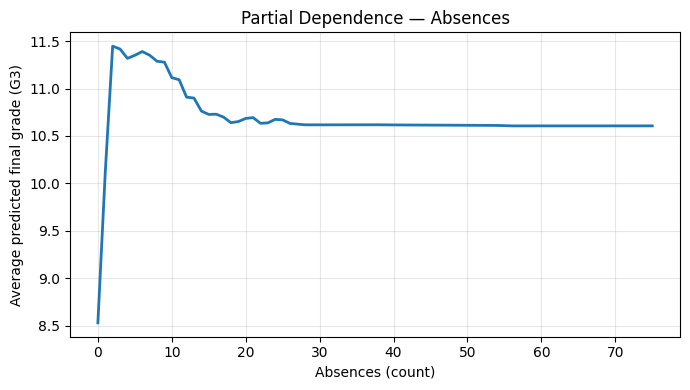

In [21]:
# pick the absences column
feature_name = "absences"  # "absences"
feature_index = X.columns.get_loc(feature_name)

# build a sensible grid (use the actual observed unique values, sorted)
# if there are many unique counts, you can thin it with slicing
vals = np.sort(X[feature_name].unique())
feature_values = vals  # or vals[::2] to thin

# Initialize array to store average predictions
average_predictions = np.zeros_like(feature_values, dtype=float)

# Duplicate the dataset to modify feature values
X_modified = X.copy()

# Loop over feature values
for i, value in enumerate(feature_values):
    # Set the chosen feature to the current value for all instances
    X_modified.iloc[:, feature_index] = value

    # Predict using the modified dataset
    preds = rf.predict(X_modified)

    # Calculate average prediction for the current feature value
    average_predictions[i] = preds.mean()

# Plot the partial dependence for the chosen feature (absences)
plt.figure(figsize=(7, 4))
plt.plot(feature_values, average_predictions, linewidth=2)
plt.xlabel("Absences (count)")
plt.ylabel("Average predicted final grade (G3)")
plt.title("Partial Dependence — Absences")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### ICE for 'absence'

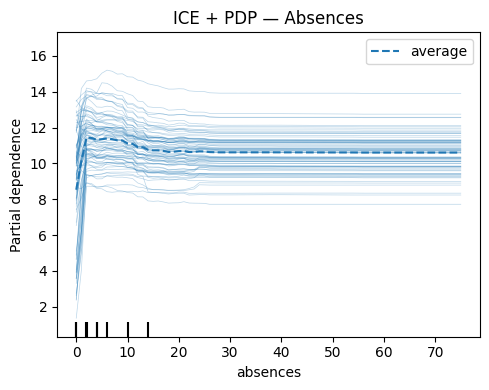

In [22]:
fig, ax = plt.subplots(figsize=(5, 4))
PartialDependenceDisplay.from_estimator(
    rf, X, ["absences"], kind="both", subsample=80, grid_resolution=50, n_jobs=-1, ax=ax
)
plt.title("ICE + PDP — Absences")
plt.tight_layout()
plt.show()

#### ALE for 'absence'

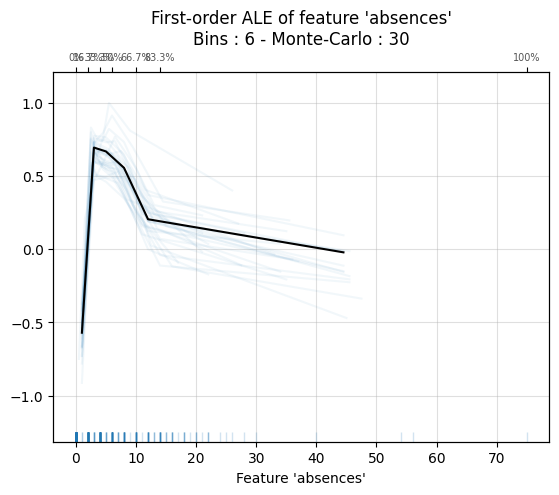

<Figure size 640x480 with 0 Axes>

In [23]:
ax = ale_plot(
    rf,
    X_train,
    "absences",
    bins=10,
    monte_carlo=True,
    monte_carlo_rep=30,
    monte_carlo_ratio=0.5,
)

fig = ax.get_figure()  # get parent figure
fig.set_size_inches(10, 15)  # resize figure
plt.tight_layout()
plt.show()

The curve from the PDP is non-linear. It rises quickly from 0 to around 2–3 absences, then steadily drops and flattens out after about 20 absences. The small rise at very low absences could just be because there aren’t many students with zero absences. After that, the expected pattern shows up — more absences = lower grades. The model predicts higher grades for students with just a few absences, but as absences increase (beyond 3 to 5), predicted grades drop. After around 20 absences, the curve levels off and stays pretty flat at just over 10.5.

This makes sense. Students with low absences generally perform better. As absences go up, performance tends to drop. And once attendance is poor enough, extra absences don’t change much.

The ICE plot shows the same trend (orange line), but we can also see that students differ a lot. Some students’ grades fall sharply with just a few absences. Others stay flat, suggesting absences don’t affect them as much.

So while the PDP gives the average decline, the ICE plot shows that absences matter much more for some students than others.

The ALE plot is also consistent. Students with very few absences tend to do slightly above average, but grades start dropping once absences pass about 5 to 7 days. After 20, the negative effect levels off, so more absences don’t make a big additional difference.

#### PDP for 'studytime'

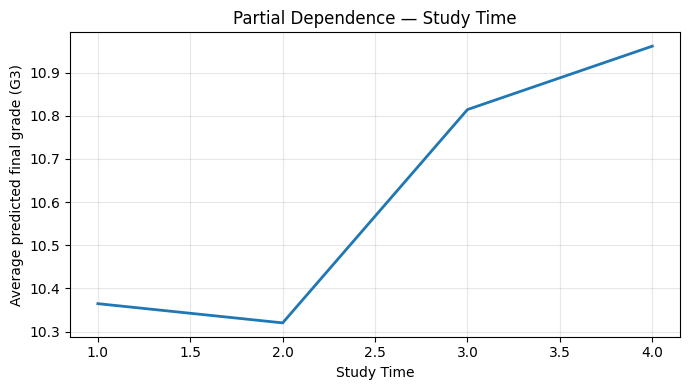

In [24]:
# pick the absences column
feature_name = "studytime"  # "absences"
feature_index = X.columns.get_loc(feature_name)

# build a sensible grid (use the actual observed unique values, sorted)
# if there are many unique counts, you can thin it with slicing
vals = np.sort(X[feature_name].unique())
feature_values = vals  # or vals[::2] to thin

# Initialize array to store average predictions
average_predictions = np.zeros_like(feature_values, dtype=float)

# Duplicate the dataset to modify feature values
X_modified = X.copy()

# Loop over feature values
for i, value in enumerate(feature_values):
    # Set the chosen feature to the current value for all instances
    X_modified.iloc[:, feature_index] = value

    # Predict using the modified dataset
    preds = rf.predict(X_modified)

    # Calculate average prediction for the current feature value
    average_predictions[i] = preds.mean()

# Plot the partial dependence for the chosen feature (absences)
plt.figure(figsize=(7, 4))
plt.plot(feature_values, average_predictions, linewidth=2)
plt.xlabel("Study Time")
plt.ylabel("Average predicted final grade (G3)")
plt.title("Partial Dependence — Study Time")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### ICE for 'studytime'

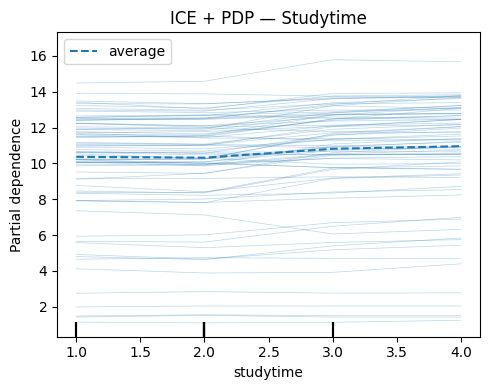

In [25]:
fig, ax = plt.subplots(figsize=(5, 4))
PartialDependenceDisplay.from_estimator(
    rf,
    X,
    ["studytime"],
    kind="both",
    subsample=80,
    grid_resolution=50,
    n_jobs=-1,
    ax=ax,
)
plt.title("ICE + PDP — Studytime")
plt.tight_layout()
plt.show()

#### ALE for 'studytime'

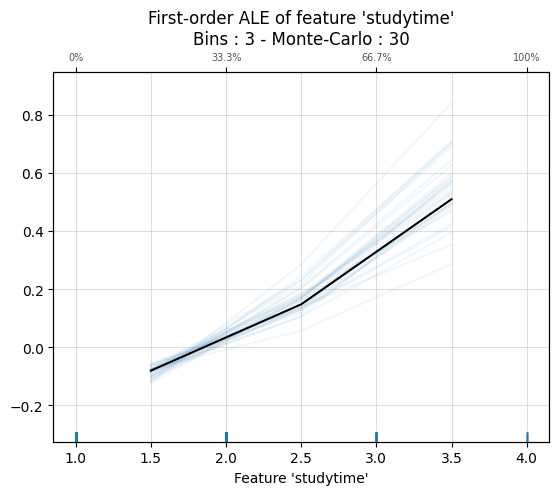

<Figure size 640x480 with 0 Axes>

In [26]:
# 1D ALE: Absences
ax = ale_plot(
    rf,
    X_train,
    "studytime",
    bins=10,
    monte_carlo=True,
    monte_carlo_rep=30,
    monte_carlo_ratio=0.5,
)

fig = ax.get_figure()  # get parent figure
fig.set_size_inches(10, 15)  # resize figure
plt.tight_layout()
plt.show()

From the PDP plot, I can see that average predicted grades stay flat when studytime is around 1–2 hours, but then jump up sharply once studytime goes beyond 2. The more studytime, the higher the predicted grade. This makes sense — more time studying usually means better understanding of the material.

The ICE plot confirms the same overall pattern (orange line), but also shows how much students differ. Some students get a big boost in predicted grades as they study more, while others barely improve. So the effect of studytime isn’t the same for everyone.

I can see a similar trend from the ALE plot but with a smoother curve. Instead of a sudden jump at 2, it shows a more gradual rise as studytime increases. This happens because ALE corrects for correlations (students who study more may also differ on other things)- thus avoiding the the sharp jump that is visible in the PDP and giving it a cleaner view of the effect.

Overall, we can evidently see that more studytime is linked to better performance. PDP shows the sharp average jump, ICE shows that not all students benefit equally, and ALE shows the gradual upward slope once we account for correlations.

So far, the PDP, ICE, and ALE plots for absences and studytime on their own give us a good idea of how each feature affects predicted grades individually. But in reality, these factors don’t act in isolation — how much time a student studies might matter differently depending on how often they miss class. To capture this kind of interaction, we need to look at both features together. Thus, in the setion below, I also create the 2D ALE plot to understand the dynamics of both my chosen features.

### 2D ALE plot for absence and studytime

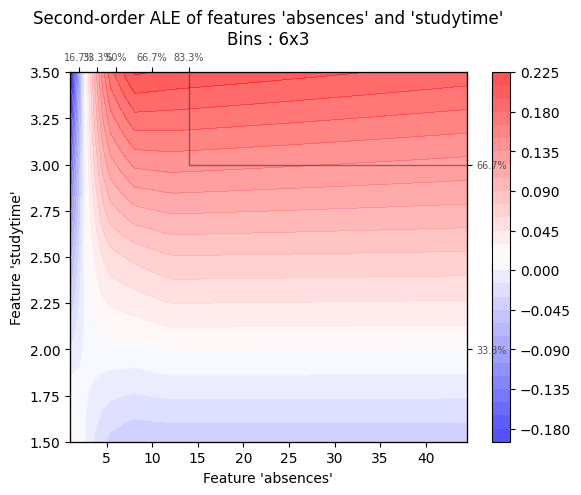

<Figure size 640x480 with 0 Axes>

In [27]:
ax = ale_plot(rf, X_train, ["absences", "studytime"], bins=10, monte_carlo=True)
fig = ax.get_figure()
fig.set_size_inches(8, 6)
plt.tight_layout()
plt.show()

From the 2D ALE plot, I see that students with high absences and low studytime do the worst (blue area). On the flip side, students with higher studytime and only moderate absences do better (red area). Either extreme is bad — very high absences or very low studytime both push grades down.

The 1D ALE plots already showed this: more absences hurt, more studytime helps. The 2D version just makes clear how the two interact.

One thing that stands out is the very top-left corner (low absences + very high studytime). It shows a neutral or even slightly negative effect. That’s probably because there aren’t many students in this group, so the estimates get noisy. It’s similar to what we saw in the PDP for absences, where the tiny bump at zero absences was likely due to very few students falling into that category.

Overall, the plots clearly show that, both absences and studytime, play an important role in predicting grades. Low absences and higher studytime are linked to better performance, while skipping too many classes or barely studying drags grades down. The PDPs gave the big picture averages, the ICE plots showed how students differ, and the ALE plots helped clean up the effects and reveal the interactions. Simply put, showing up and putting in the study hours really does matter.